# Download Fingerprint Dataset

In [1]:
import os
import requests
import zipfile
import shutil

# URLs for datasets
urls = {
    "DB1": "http://bias.csr.unibo.it/fvc2004/Downloads/DB1_B.zip",
    "DB2": "http://bias.csr.unibo.it/fvc2004/Downloads/DB2_B.zip",
    "DB3": "http://bias.csr.unibo.it/fvc2004/Downloads/DB3_B.zip",
    "DB4": "http://bias.csr.unibo.it/fvc2004/Downloads/DB4_B.zip"
}

# Directory to save datasets
base_dir = "/content/fingerprint_datasets"
final_dir = "/content/DBs_Dataset"
original_images_dir = os.path.join(final_dir, "original_images")

# Create the necessary directories
os.makedirs(original_images_dir, exist_ok=True)

# Function to download and extract dataset
def download_and_extract(url, save_dir):
    # Create a folder for each database to store the extracted files separately
    db_name = os.path.splitext(os.path.basename(url))[0]
    db_save_dir = os.path.join(save_dir, db_name)
    os.makedirs(db_save_dir, exist_ok=True)

    zip_path = os.path.join(db_save_dir, os.path.basename(url))

    if not os.path.exists(zip_path):
        response = requests.get(url)
        with open(zip_path, 'wb') as f:
            f.write(response.content)

    # Extract the zip file to the corresponding directory
    extract_dir = os.path.splitext(zip_path)[0]
    if not os.path.exists(extract_dir):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)

    return extract_dir, db_name

# Download and extract all datasets into separate directories
extracted_dirs = {}
for db, url in urls.items():
    extracted_dirs[db] = download_and_extract(url, base_dir)

# Move and rename all image files into the final folder with prefix
for db, (db_dir, db_name) in extracted_dirs.items():
    for root, dirs, files in os.walk(db_dir):
        for file in files:
            if file.endswith('.tif'):
                # Construct the new file name with the dataset name as prefix
                new_name = f"{db_name}_{file}"
                old_path = os.path.join(root, file)
                new_path = os.path.join(original_images_dir, new_name)

                # Rename and move the file
                shutil.move(old_path, new_path)

# Delete the 'fingerprint_datasets' directory after the work is complete
shutil.rmtree(base_dir)

# Final output print
print(f"All images are renamed and moved to {original_images_dir}, and {base_dir} has been deleted.")


All images are renamed and moved to /content/DBs_Dataset/original_images, and /content/fingerprint_datasets has been deleted.


In [2]:
!git clone https://github.com/raffaele-cappelli/pyfing.git


Cloning into 'pyfing'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 221 (delta 36), reused 47 (delta 21), pack-reused 142 (from 1)
Receiving objects: 100% (221/221), 122.34 MiB | 11.29 MiB/s, done.
Resolving deltas: 100% (88/88), done.
Updating files: 100% (47/47), done.


# Download Validation Dataset

In [3]:
# Define the path to the file
file_path = '/content/pyfing/pyfing/segmentation.py'

# Open the file in read mode to get its content
with open(file_path, 'r') as file:
    content = file.readlines()

# Modify the specific line in the content
modified_content = []
for line in content:
    if "from .definitions import Image, Parameters" in line:
        modified_content.append("from definitions import Image, Parameters\n")
    else:
        modified_content.append(line)

# Write the modified content back to the file
with open(file_path, 'w') as file:
    file.writelines(modified_content)

print(f"Modified the file {file_path} successfully.")


Modified the file /content/pyfing/pyfing/segmentation.py successfully.


# Download Validation Dataset

In [4]:
import cv2 as cv
import os
from glob import glob

import sys
sys.path.append('pyfing/pyfing')

# Now you should be able to import the segmentation module
import segmentation
from segmentation import Gmfs, GmfsParameters

# Directories
input_dir = '/content/DBs_Dataset/original_images'
output_dir = '/content/DBs_Dataset/validation'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Loop through all .tif images in the original_images directory
for image_path in glob(os.path.join(input_dir, '*.tif')):
    # Read the image in grayscale
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    # Check if the image was loaded successfully
    if image is not None:
        # Initialize the GmfsParameters and Gmfs objects
        parameters = GmfsParameters()
        segmentation_method = Gmfs(parameters)

        # Perform the segmentation
        segmented_image = segmentation_method.run(image)

        # Construct the output path with the original name and "_seg" suffix
        filename = os.path.basename(image_path)
        output_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_val_seg.tif")

        # Save the segmented image
        cv.imwrite(output_path, segmented_image)

# Final output print
print(f"Segmentation completed. Segmented images are saved in {output_dir}.")


Segmentation completed. Segmented images are saved in /content/DBs_Dataset/validation.


# An Other Method
<span style="font-size: 60px;">ResNet50 & U-Net Hybrid Model</span>

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 87s 318ms/step - accuracy: 0.8893 - loss: 0.2533 - val_accuracy: 0.4039 - val_loss: 3.7770
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.9742 - loss: 0.0557 - val_accuracy: 0.4961 - val_loss: 3.0188
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.9792 - loss: 0.0407 - val_accuracy: 0.4039 - val_loss: 4.5551
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.9809 - loss: 0.0357 - val_accuracy: 0.4133 - val_loss: 4.6310
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.9836 - loss: 0.0288 - val_accuracy: 0.4282 - val_loss: 4.3754
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.9844 - loss: 0.0264 - val_accuracy: 0.5618 - val_loss: 2.6032
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.9857 - loss: 0.0234 - val_accuracy: 0.6188 - val_loss: 1.8891
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/ste

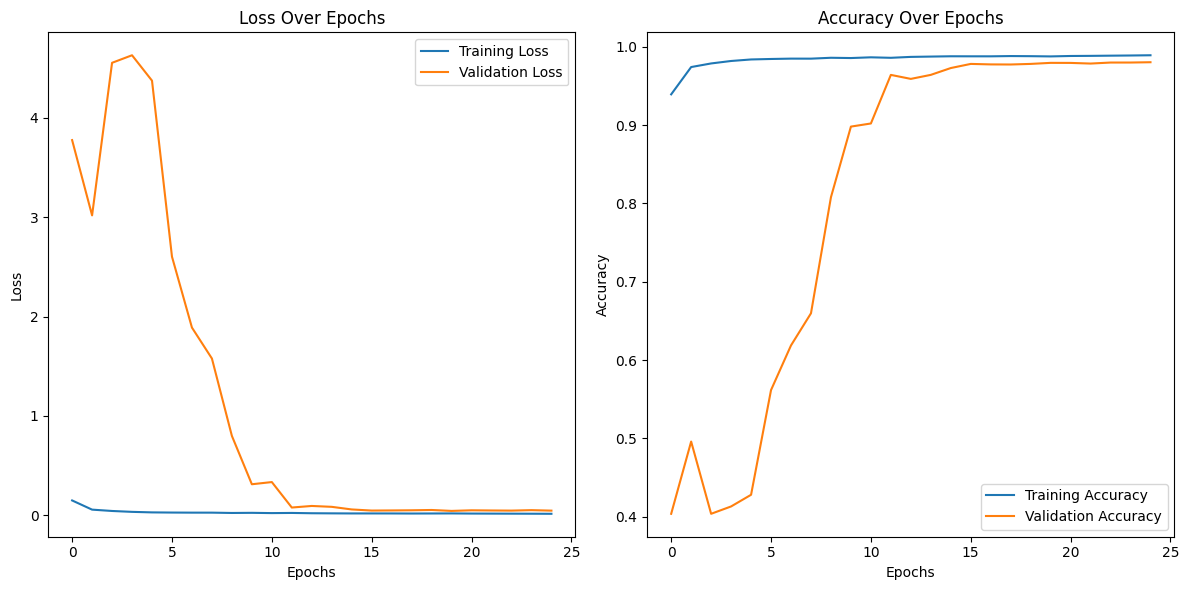

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import cv2
from sklearn.metrics import jaccard_score
from tqdm import tqdm
import matplotlib.pyplot as plt

def calculate_error_probabilities(seg_image, val_image):
    # Ensure the images are binary (foreground=255, background=0)
    _, seg_image = cv2.threshold(seg_image, 128, 255, cv2.THRESH_BINARY)
    _, val_image = cv2.threshold(val_image, 128, 255, cv2.THRESH_BINARY)

    # Calculate True Background (Nbrb) and True Foreground (Nbrf)
    Nbrb = np.sum(val_image == 0)  # True background pixels in validation
    Nbrf = np.sum(val_image == 255)  # True foreground pixels in validation

    # Calculate Number of Background Classification Errors (Nbrbe)
    Nbrbe = np.sum((seg_image == 255) & (val_image == 0))  # Foreground classified as background

    # Calculate Number of Foreground Classification Errors (Nbrfe)
    Nbrfe = np.sum((seg_image == 0) & (val_image == 255))  # Background classified as foreground

    # Calculate Prob1 and Prob2
    Prob1 = Nbrbe / Nbrb if Nbrb > 0 else 0  # Probability that foreground is classified as background
    Prob2 = Nbrfe / Nbrf if Nbrf > 0 else 0  # Probability that background is classified as foreground

    # Calculate ProbErr
    ProbErr = (Prob1 + Prob2) / 2

    return Prob1, Prob2, ProbErr

# Define paths
original_path = '/content/DBs_Dataset/original_images'
validation_path = '/content/DBs_Dataset/validation'
output_path = '/DBs_Dataset/resnet_segment'

# Create output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

def create_unet_resnet50(input_shape=(256, 256, 3)):
    # Load ResNet50 as encoder
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Get intermediate layers for skip connections
    s1 = base_model.get_layer('conv1_relu').output
    s2 = base_model.get_layer('conv2_block3_out').output
    s3 = base_model.get_layer('conv3_block4_out').output
    s4 = base_model.get_layer('conv4_block6_out').output

    # Bridge
    bridge = base_model.get_layer('conv5_block3_out').output

    # Decoder
    d1 = UpSampling2D((2, 2))(bridge)
    d1 = concatenate([d1, s4])
    d1 = Conv2D(512, (3, 3), padding='same', activation='relu')(d1)

    d2 = UpSampling2D((2, 2))(d1)
    d2 = concatenate([d2, s3])
    d2 = Conv2D(256, (3, 3), padding='same', activation='relu')(d2)

    d3 = UpSampling2D((2, 2))(d2)
    d3 = concatenate([d3, s2])
    d3 = Conv2D(128, (3, 3), padding='same', activation='relu')(d3)

    d4 = UpSampling2D((2, 2))(d3)
    d4 = concatenate([d4, s1])
    d4 = Conv2D(64, (3, 3), padding='same', activation='relu')(d4)

    d5 = UpSampling2D((2, 2))(d4)
    output = Conv2D(1, (1, 1), activation='sigmoid')(d5)

    model = Model(inputs=base_model.input, outputs=output)
    return model

def load_and_preprocess_data():
    # Load original images
    original_images = sorted([f for f in os.listdir(original_path) if f.endswith('.tif')])
    validation_images = sorted([f for f in os.listdir(validation_path) if f.endswith('.tif')])

    X = []
    y = []

    for orig_img, val_img in zip(original_images, validation_images):
        # Read and preprocess original image
        img = cv2.imread(os.path.join(original_path, orig_img))
        img = cv2.resize(img, (256, 256))
        img = img / 255.0
        X.append(img)

        # Read and preprocess validation image
        mask = cv2.imread(os.path.join(validation_path, val_img), cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (256, 256))
        mask = mask / 255.0
        mask = np.expand_dims(mask, axis=-1)
        y.append(mask)

    return np.array(X), np.array(y)

def plot_training_history(history):
    # Plot loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

def train_model():
    # Load and preprocess data
    X, y = load_and_preprocess_data()

    # Create and compile model
    model = create_unet_resnet50()
    model.compile(optimizer=Adam(learning_rate=1e-4),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # Train model
    history = model.fit(X, y, batch_size=4, epochs=25, validation_split=0.2)

    # Plot training history
    plot_training_history(history)

    return model

def post_process(pred_mask):
    # Convert prediction to binary
    pred_mask = (pred_mask > 0.5).astype(np.uint8)

    # Apply morphological operations
    kernel = np.ones((3,3), np.uint8)
    pred_mask = cv2.morphologyEx(pred_mask, cv2.MORPH_OPEN, kernel)
    pred_mask = cv2.morphologyEx(pred_mask, cv2.MORPH_CLOSE, kernel)

    return pred_mask

def evaluate_predictions(model):
    # Load test images
    original_images = sorted([f for f in os.listdir(original_path) if f.endswith('.tif')])
    validation_images = sorted([f for f in os.listdir(validation_path) if f.endswith('.tif')])

    iou_scores = []
    prob1_scores = []
    prob2_scores = []
    proberr_scores = []

    for i, (orig_img, val_img) in enumerate(zip(original_images, validation_images)):
        # Read and preprocess original image
        img = cv2.imread(os.path.join(original_path, orig_img))
        img_resized = cv2.resize(img, (256, 256))
        img_normalized = img_resized / 255.0

        # Make prediction
        pred = model.predict(np.expand_dims(img_normalized, axis=0))[0]
        pred = cv2.resize(pred, (img.shape[1], img.shape[0]))

        # Post-process prediction
        pred_mask = post_process(pred)

        # Read ground truth
        gt_mask = cv2.imread(os.path.join(validation_path, val_img), cv2.IMREAD_GRAYSCALE)
        gt_mask = (gt_mask > 0).astype(np.uint8)

        # Calculate IoU
        iou = jaccard_score(gt_mask.flatten(), pred_mask.flatten())
        iou_scores.append(iou)

        # Calculate Prob1, Prob2, and ProbErr
        prob1, prob2, proberr = calculate_error_probabilities(pred_mask * 255, gt_mask * 255)
        prob1_scores.append(prob1)
        prob2_scores.append(prob2)
        proberr_scores.append(proberr)

        # Save segmented image
        cv2.imwrite(os.path.join(output_path, f'seg_{i}.tif'), pred_mask * 255)

    mean_iou = np.mean(iou_scores)
    mean_prob1 = np.mean(prob1_scores)
    mean_prob2 = np.mean(prob2_scores)
    mean_proberr = np.mean(proberr_scores)

    print(f'Mean IoU: {mean_iou:.4f}')
    print(f'Mean Prob1: {mean_prob1:.4f}')
    print(f'Mean Prob2: {mean_prob2:.4f}')
    print(f'Mean ProbErr: {mean_proberr:.4f}')

def main():
    # Train the model
    model = train_model()

    # Evaluate and save predictions
    evaluate_predictions(model)

if __name__ == "__main__":
    main()
